Labels:

0 - Negative

1 - Positive

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud as wc
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer as cv

In [4]:
df1 = pd.read_csv(r'../Dataset/pos_label.csv',encoding='UTF-8')
df2 = pd.read_csv(r'../Dataset/neg_label.csv',encoding='UTF-8')
df = pd.concat([df1,df2], ignore_index=True)

In [5]:
df.shape

(200000, 2)

In [6]:
df.sample(5)

,Label,Comment
161640,0,wack azz showhank is a fool for marrying kendr...
154260,0,Form over functionIf you're looking for a clea...
154269,0,NON-RETURNABLE ITEM!!!!!I got bad info from th...
2488,1,FineJesus! They were all great! They were in g...
42155,1,myerhaven2This movie is a great Christian fami...


In [7]:
df.isnull().sum()

Label      0
Comment    0
dtype: int64

<Axes: ylabel='Frequency'>

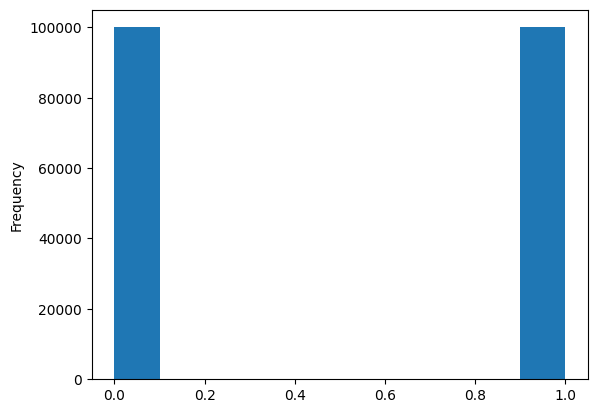

In [8]:
df['Label'].plot(bins=10, kind='hist')

In [9]:
negative_reviews = df[df['Label']==0]
negative_reviews.iloc[:3]

,Label,Comment
100000,0,Pointless and awfulWhy adapt a work of art tha...
100001,0,"So, so bad. Just...don't.I spent half the movi..."
100002,0,S/M/HDon't waste your time or money. This turd...


In [10]:
positive_reviews = df[df['Label']==1]
positive_reviews.iloc[:3]

,Label,Comment
0,1,"Cute, colorful and fun bookThis is a great lit..."
1,1,Best so far?Some acts keep cranking out the sa...
2,1,My favorite Koontz bookI was intrigued by this...


In [11]:
pos_list = positive_reviews['Comment'].tolist()
pos_list[:3]

['Cute, colorful and fun bookThis is a great little book for babies and toddlers. The pictures are really cute and it doubles as a toy for younger children.',
 "Best so far?Some acts keep cranking out the same stuff, album after album. Heck, with GA I'd be content with that, and I'd still buy all of it.But Groove Armada seems to me to be among the select few that actually evolves over time, and their music evolves with them. Mind you, Love Box is no huge departure--but this is louder, rougher around the edges, and it's absolutely slamming.Keep it coming!",
 "My favorite Koontz bookI was intrigued by this story of a simple pastry chef with a prediction of five terrible days hanging over his head. The terrible days come in the form of an insane clown with the unlikely name of Konrad Beazler and his son, Punchinello. Konrad raises Punchinello to be the worlds greatest clown but the lad can't even take a decent pratfall."]

In [12]:
pos_string = " ".join(pos_list)
len(pos_string)

41586669

In [13]:
neg_list = negative_reviews['Comment'].tolist()
neg_list[:3]

['Pointless and awfulWhy adapt a work of art that is genius into a boring superficial version? It\'s not as if the original Frankenstein is so hard to understand, as are some "classics" such as Paradise Lost. It\'s an easy read and full of poetic imagery. I do not recommend this version. I see no point to it. Even a child could read the original.',
 "So, so bad. Just...don't.I spent half the movie looking for my nerve pills, and the other half wondering where Harry's glasses were. The plot was predictable, and the ending left me stupefied. Um, not in a good way.",
 "S/M/HDon't waste your time or money. This turd of a movie should've never found it's way out of the toilet bowl. Trust me, the scariest thing here is the price of this stinker, @ $9.99, it's $10 too much! The one good thing about this movie? I saw it in the privacy of my own home, so nobody but me, myself & I (& the select few I saw it with) knows how stupid I am for renting it! :D"]

In [14]:
neg_string = " ".join(neg_list)
len(neg_string)

44666963

In [15]:
#remove punctuation and unwanted words
punctuation_ = string.punctuation + '1234567890Â©á»áº¯ÄÃ'+ '¢`~¡¢£¤¥¦§¨©ª«¬®¯°±²³´µ¶·¸¹º»¼½¾¿×÷¢£¤¥¦§©´µ¶·¸¹º€£¥₹₽₿₣₱₩₨₫₮₭₣₢₥₦₠₡₧₤₮₯₰₲₱₴₵₸₹₺₻₼₽₿'
punctuation_

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~1234567890Â©á»áº¯ÄÃ¢`~¡¢£¤¥¦§¨©ª«¬®¯°±²³´µ¶·¸¹º»¼½¾¿×÷¢£¤¥¦§©´µ¶·¸¹º€£¥₹₽₿₣₱₩₨₫₮₭₣₢₥₦₠₡₧₤₮₯₰₲₱₴₵₸₹₺₻₼₽₿'

In [16]:
pos_list=[ch for ch in pos_string if ch not in punctuation_]
pos_string = ''.join(pos_list)
len(pos_string)

40171545

In [17]:
neg_list=[ch for ch in neg_string if ch not in punctuation_]
neg_string = ''.join(neg_list)
len(neg_string)

43076853

In [18]:
#remove stopwords
stopw = stopwords.words('english')
stopw.extend(list(string.ascii_lowercase))
# stopw.extend(['0','1','2','3','4','5','6','7','8','9'])
stopw[:5]

['i', 'me', 'my', 'myself', 'we']

In [19]:
pos_list = [word for word in pos_string.split() if word.lower() not in stopw]
pos_string = " ".join(pos_list)
len(pos_string)

26871614

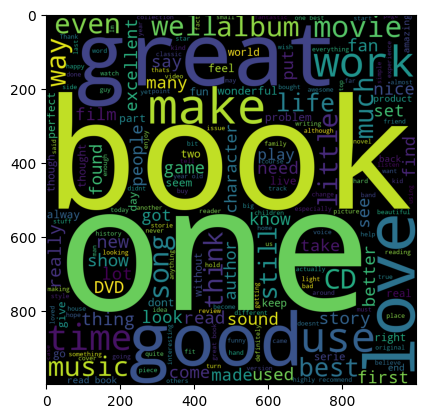

In [20]:
wordcloud = wc(width=1000, height=1000, background_color='black').generate(pos_string)
plt.imshow(wordcloud)

In [21]:
neg_list = [word for word in neg_string.split() if word.lower() not in stopw]
neg_string = ' '.join(neg_list)
len(neg_string)

28369560

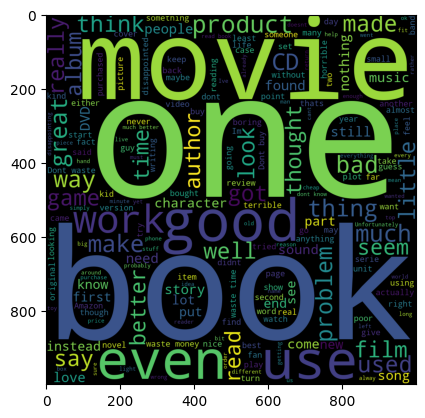

In [22]:
wordcloud = wc(width=1000, height=1000, background_color='black').generate(neg_string)
plt.imshow(wordcloud)